## Mean Shift

### Introduction to Mean Shift

K-Mean: Based on Distance  
Mean Shift: Based on Density  
Mean Shift use probablity density function to find centroid. Spot that has highest probalbility density(peak of probability density dist.) become cluster centroid. To find probability density we use KDE  
KDE(Kernel Density Estimation): Probabilty Density Function estimation method using Kernel function.  
Gaussian Dist. Function: One of the most popular Kernel func.  
Bandwidth: Smoothing hyper parameter. Make shape of KDE smoother or sharper.  
Sharp(Narrow) KDE is easy to overfitted and Smooth(Flatten) KDE is easy to underfitted. So calculating appropriate bandwith is very important.  
Generally, big bandwidth leads to small # of cluster centroid and small bandwidth leads to big # of cluster centroid.  
Hence, the most important parameter for Mean Shift is bandwidth.  
Sklearn module provide estimate_bandwidth() function to find optimal bandwidth.  

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
import pandas as pd

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8)

meanshift9= MeanShift(bandwidth=0.9)
cluster_labels = meanshift9.fit_predict(X)
print('Unique Cluster Labels:', np.unique(cluster_labels))

Unique Cluster Labels: [0 1 2 3 4 5]


In [9]:
# 8 lables are too big! Raise bandwidth from 0.9 to 1.1
meanshift10= MeanShift(bandwidth=1.1)
cluster_labels = meanshift10.fit_predict(X)
print('Unique Cluster Labels:', np.unique(cluster_labels))

Unique Cluster Labels: [0 1 2 3]


In [10]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('Optimal Bandwidth Value:', round(bandwidth,3))

Optimal Bandwidth Value: 1.896


In [13]:
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('Unique Cluster Labels:',np.unique(cluster_labels))    

Unique Cluster Labels: [0 1 2]


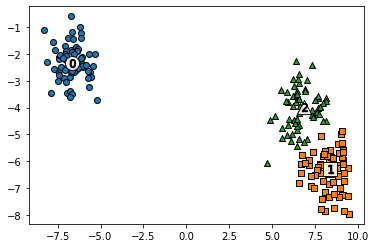

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

cluster_df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()


In [16]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       2                  64
        1                   3
1       0                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64
